In [83]:
import gp
from importlib import reload
import re
import numpy as np
import unittest
import yt
import matplotlib.pylab as plt
from math import *

In [82]:
reload(gp)
shape=[1000]
domain=[[0,5]]
geo=gp.geometry(shape,domain,coordinates="spherical")

In [75]:
sim = gp.gp_simulation( "out/phi_real00312/","out/phi_imag00312/",geo)

AttributeError: module 'gp' has no attribute 'gp_simulation'

In [ ]:
ps=yt.load( "out/phi_real00312")

In [ ]:
ps.all_data()["boxlib","phi"]

In [ ]:
(1/pi)**(3.74)

In [ ]:
alpha=1
r2 = geo.positions(0) **2 + geo.positions(1)**2 + geo.positions(2)**2
y=np.exp(- alpha * r2 )
lapY=(3*alpha + (- 2 * alpha**2 + 0.5 )*r2 ) * y
y2=gp_c.evaluate(y,y,geo)

In [ ]:
%matplotlib notebook
#plt.plot(r2.flatten(),y2.flatten() , "ob")
np.max( (lapY - y2).flatten() )

In [ ]:
alpha=0.5
1./(pi/(2*alpha))**(3/4)

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def laplacianSpherical(y, domain=[0,1],order=2):
    y2=y*0
    dx=(domain[1] - domain[0] )/len(y)
    for i in range(0,len(y)-1):
        x=domain[0] + (i+0.5) *dx

        #dy2 = ( y[i + 1] + y[abs(i  - 1) ] -2*y[i] )/(dx**2)
        #dy= (y[i+1] - y[abs(i-1)] )/(2*dx)
        #y2[i]=dy2 + 2*dy/x
        
        y2[i]= ( y[i + 1]*(x+dx) + y[abs(i  - 1) ]*(x-dx) -2*y[i]*x )/(x*dx**2)
    i=0
    x=0.5*dx
    y2[i]= ( -2 * y[i + 1]*(x+dx) + y[i+2 ]*(x+2*dx) + y[i]*x )/(x*dx**2)
    #y2[i]= ( -5 * y[i + 1]*(x+dx) + 4 *y[i+2 ]*(x+2*dx) - y[i+3]*(x+3*dx) + 2 * y[i]*x )/(x*dx**2)
        
    return y2

In [66]:
%matplotlib notebook
alpha=1
domain=[0,10]
bins=1000
geo=gp.geometry([bins],[ domain ])
x=geo.positions(0)
y=np.exp(-alpha*x**2)
yt=np.exp(- alpha*x**2 ) * (3* alpha  + x**2 * (-2*alpha*alpha + 0.5  ) )
y2=-0.5*laplacianSpherical(y,domain=domain,order=2) + 0.5*x**2 * y
plt.plot(x,y2,"o")
plt.plot(x,yt,"o--",label="exact")
plt.legend()
np.max(np.abs(y2-yt))

NameError: name 'laplacianSpherical' is not defined

In [131]:
import pyarrow.parquet as pq
import gpIo
import itertools
reload(gpIo)
sims=gpIo.gp_simulations("./testGPDropletSpherical")

<IPython.core.display.Javascript object>


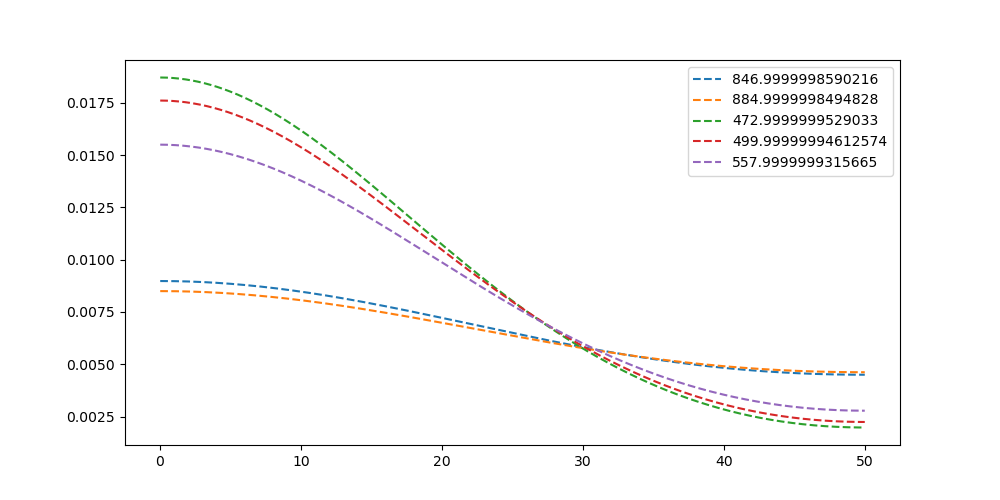

In [132]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,5)
cmap=plt.get_cmap("Greens")

M=5
filtered_sims = sims.simulations[0:len(sims):len(sims)//M]
max_time = max([ sim.time for sim in filtered_sims ])

for i,sim in enumerate(filtered_sims):
    c=sim.time/max_time
    
    sim=sims.simulations[i]
    x=sim.getGeometry(0).positions(0).flatten()
    y=sim.getField(0,"phi_real").flatten()
    time=sim.time
    plt.plot(x,y,"--",alpha=1,label=str(time))
#plt.plot(x,np.exp(-0.5*x**2)/(pi)**(3./4)  ,"-",label="exact")

plt.legend()

In [127]:
np.sqrt( 15/(4/3*pi*50**3) )

0.005352372348458314